In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage étendu
pd.set_option('display.max_columns', None)

# Chargement des données
train = pd.read_csv("airbnb_train.csv")
test = pd.read_csv("airbnb_test.csv")

print("Shape du test  :", test.shape)

train.head()


Shape du test  : (51877, 27)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,NaN,t,f,NaN,2015-12-12,t,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,2017-05-07,t,t,100%,2016-11-04,t,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",NaN,t,f,NaN,2016-12-11,t,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,2016-10-07,t,t,100%,2012-08-04,f,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,2016-09-25,t,t,100%,2013-07-25,f,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [4]:
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, '% Missing': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='% Missing', ascending=False)
missing_df


,Missing Values,% Missing
host_response_rate,5475,24.624449
review_scores_rating,4978,22.389134
first_review,4725,21.251237
last_review,4716,21.210758
neighbourhood,2086,9.382028
zipcode,303,1.362778
host_has_profile_pic,56,0.251867
host_identity_verified,56,0.251867
host_since,56,0.251867
bathrooms,51,0.229378


In [5]:
cols_to_drop = ['host_response_rate', 'review_scores_rating', 'first_review', 'last_review']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)


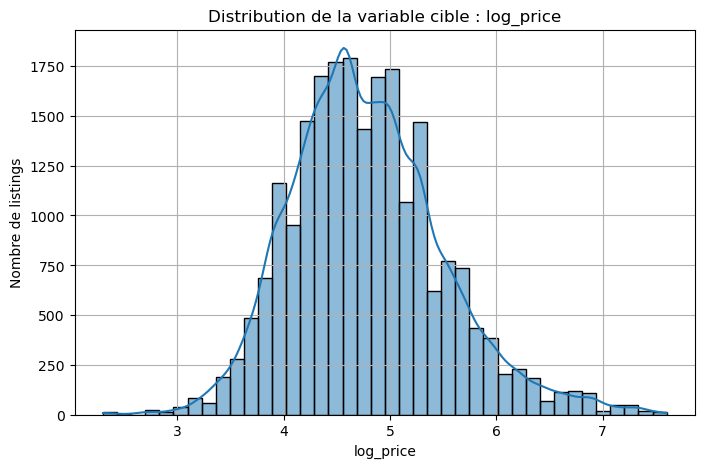

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train['log_price'], bins=40, kde=True)
plt.title("Distribution de la variable cible : log_price")
plt.xlabel("log_price")
plt.ylabel("Nombre de listings")
plt.grid(True)
plt.show()


In [7]:
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

for col in cat_cols:
    print(f"\n📌 {col.upper()} ({train[col].nunique()} modalités)")
    print(train[col].value_counts(normalize=True).head(5))



📌 PROPERTY_TYPE (31 modalités)
property_type
Apartment      0.658226
House          0.223307
Condominium    0.037600
Townhouse      0.022803
Loft           0.017136
Name: proportion, dtype: float64

📌 ROOM_TYPE (3 modalités)
room_type
Entire home/apt    0.555366
Private room       0.414635
Shared room        0.029999
Name: proportion, dtype: float64

📌 BED_TYPE (5 modalités)
bed_type
Real Bed         0.972475
Futon            0.009985
Pull-out Sofa    0.007286
Airbed           0.006567
Couch            0.003688
Name: proportion, dtype: float64

📌 CANCELLATION_POLICY (5 modalités)
cancellation_policy
strict             0.437438
flexible           0.303769
moderate           0.256904
super_strict_30    0.001664
super_strict_60    0.000225
Name: proportion, dtype: float64

📌 CITY (6 modalités)
city
NYC        0.438023
LA         0.300081
SF         0.086534
DC         0.078438
Chicago    0.050688
Name: proportion, dtype: float64


In [8]:
#impter les colonnes peut manquantes 
# Exemple pour les colonnes numériques
train['bathrooms'].fillna(train['bathrooms'].median(), inplace=True)
train['bedrooms'].fillna(train['bedrooms'].median(), inplace=True)
train['beds'].fillna(train['beds'].median(), inplace=True)

# Colonnes booléennes
bool_cols = ['host_has_profile_pic', 'host_identity_verified']
for col in bool_cols:
    train[col].fillna('faux', inplace=True)
    test[col].fillna('faux', inplace=True)


In [9]:
def parse_cleaning_fee(x):
    if isinstance(x, str) and '$' in x:
        return float(x.replace('$','').replace(',',''))
    elif x is True:
        return 1.0
    elif x is False:
        return 0.0
    else:
        return np.nan

train['cleaning_fee'] = train['cleaning_fee'].apply(parse_cleaning_fee)
test['cleaning_fee'] = test['cleaning_fee'].apply(parse_cleaning_fee)

train['cleaning_fee'].fillna(0.0, inplace=True)
test['cleaning_fee'].fillna(0.0, inplace=True)


In [10]:
#creer des feautures utiles
# Longueur du texte
train['desc_length'] = train['description'].fillna('').apply(len)
test['desc_length'] = test['description'].fillna('').apply(len)

# Nombre d’aménités
train['n_amenities'] = train['amenities'].fillna('').apply(lambda x: len(x.split(',')))
test['n_amenities'] = test['amenities'].fillna('').apply(lambda x: len(x.split(',')))

# Ancienneté de l’hôte
from datetime import datetime
today = pd.to_datetime('2025-01-01')
train['host_since'] = pd.to_datetime(train['host_since'], errors='coerce')
test['host_since'] = pd.to_datetime(test['host_since'], errors='coerce')
train['host_age_days'] = (today - train['host_since']).dt.days
test['host_age_days'] = (today - test['host_since']).dt.days


In [11]:
cols_to_drop = ['log_price', 'id', 'description', 'name', 'amenities', 'first_review', 'last_review']

# Garder seulement celles qui existent encore
existing_cols = [col for col in cols_to_drop if col in train.columns]
X = train.drop(columns=existing_cols)
y = train['log_price']

# Idem pour test
X_test = test[X.columns]


In [12]:
# Définir X sans les colonnes non utiles
X = train.drop(columns=['log_price', 'id', 'description', 'name', 'amenities'])
y = train['log_price']
X_test = test[X.columns]

# Colonnes numériques
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Colonnes catégorielles
cat_cols = X.select_dtypes(include='object').columns.tolist()


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Pipeline numérique
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline catégoriel
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline global
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [14]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split rapide
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1))
])

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédiction
y_pred = xgb_model.predict(X_val)

# Évaluation
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("✅ RMSE sur validation (XGBoost) :", round(rmse, 4))


✅ RMSE sur validation (XGBoost) : 0.4089


In [22]:
# Entraîne XGBoost sur tout le jeu d'entraînement
xgb_model.fit(X, y)

# Prédictions sur le test set
final_preds = xgb_model.predict(X_test)

# On suppose que 'id' est dans test_original
ids = pd.read_csv("airbnb_test.csv")['Unnamed: 0']


submission = pd.DataFrame({
    'id': ids,
    'prediction': final_preds
})

submission.to_csv("prediction.csv", index=False)
submission.head()



,id,prediction
0,14282777,4.822104
1,17029381,5.663960
2,7824740,4.877338
3,19811650,5.756441
4,12410741,4.590585
